In [4]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,random_split
from torch.optim import SGD,Adam
import torch.nn.functional as F
import torch.nn as nn

In [22]:
#transforms
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

In [23]:
#training data folder path
dataset_path = r'S:\Project dataset\Mango dataset'

In [24]:
#instanciate dataset
dataset = datasets.ImageFolder(dataset_path,transform = transform)

In [25]:
dataloader = DataLoader(dataset,batch_size = 64,shuffle = True)

In [26]:
man_class = []

In [27]:
print("Class-to-Index Mapping:")
for folder, label in dataset.class_to_idx.items():
    man_class.append(folder)
    print(f"Folder: {folder} -> Label: {label}")

Class-to-Index Mapping:
Folder: Ashshina Zhinuk -> Label: 0
Folder: Bari -11 -> Label: 1
Folder: Chausa -> Label: 2
Folder: Fazli -> Label: 3
Folder: Gourmati -> Label: 4
Folder: Harivanga -> Label: 5
Folder: Harumanis -> Label: 6
Folder: Katimon -> Label: 7
Folder: Langra -> Label: 8


In [28]:
man_class

['Ashshina Zhinuk',
 'Bari -11',
 'Chausa',
 'Fazli',
 'Gourmati',
 'Harivanga',
 'Harumanis',
 'Katimon',
 'Langra']

In [29]:
m = torch.zeros(3)
s = torch.zeros(3)

for images,_ in dataloader:
    m +=images.mean([0,2,3])
    s  +=images.std([0,2,3])
m /=len(dataloader)
s /=len(dataloader)

In [30]:
#deciding training and testing dataset size
train_size = int(0.8 * len(dataset))
test_size =  int(0.2 * len(dataset))

In [31]:
#spliting training and testing data

train_dataset,test_dataset = random_split(dataset,[train_size,test_size])

In [32]:
train_loader = DataLoader(train_dataset,batch_size = 64,shuffle = True)
test_loader = DataLoader(test_dataset,batch_size = 64,shuffle  =True)

In [33]:
item = iter(train_loader)
img,label = next(item)

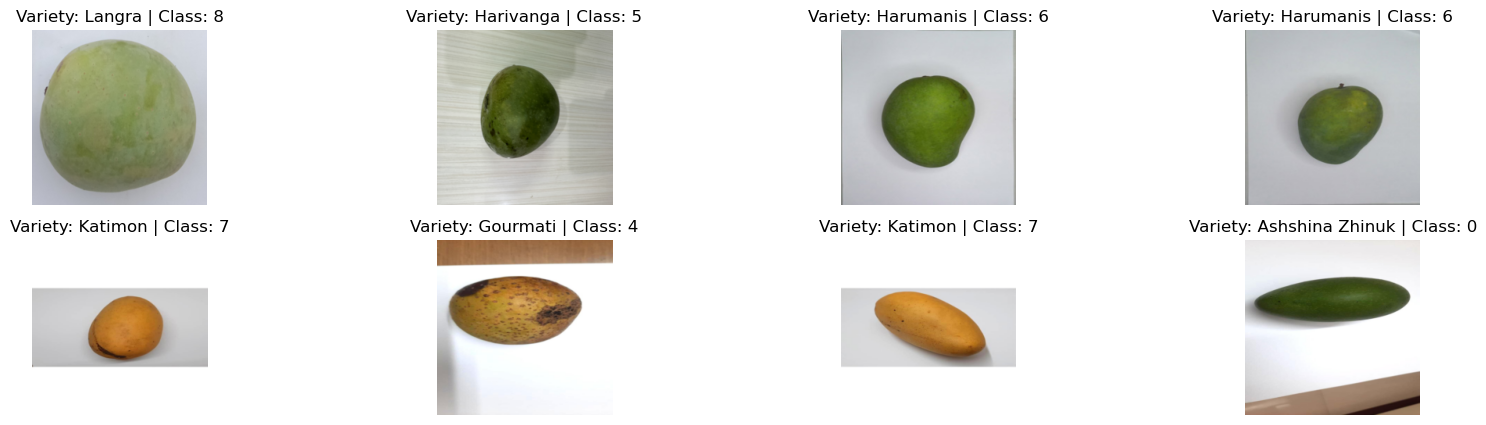

In [41]:
fig,axes = plt.subplots(2,4,figsize = (20,5))
c = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        if c>len(img):
            break
        image = img[c].permute(1,2,0)
        axes[i][j].imshow(image)
        axes[i][j].set_title(f"Variety: {man_class[label[c]]} | Class: {label[c]}")
        axes[i][j].axis("off")
        c+=1
#fig.tight_layout()
plt.show()

In [35]:
img[2].shape

torch.Size([3, 224, 224])

In [73]:
#creating model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,5,stride = 1,padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,32,5,stride = 1,padding = 1)
        self.fc1 = nn.Linear(32*54*54,120)
        self.fc2 = nn.Linear(120,32)
        self.fc3 = nn.Linear(32,10)
        self.dropout = nn.Dropout(0.3)
    def forward(self,x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim = 1)
        return x
        

In [80]:
#creating a model instance

model = Network()

In [81]:
#defining loss function and optimizer

#loss function
criteria = nn.CrossEntropyLoss()

#optimizer

optimizer = SGD(model.parameters(),lr = 0.01)


The epoch: 1 and training loss: 2.183120
The epoch: 1 and testing loss: 2.138033
The epoch: 2 and training loss: 1.850142
The epoch: 2 and testing loss: 1.701341
The epoch: 3 and training loss: 1.484949
The epoch: 3 and testing loss: 1.475863
The epoch: 4 and training loss: 1.332827
The epoch: 4 and testing loss: 1.273782
The epoch: 5 and training loss: 1.182884
The epoch: 5 and testing loss: 1.193835
The epoch: 6 and training loss: 1.150359
The epoch: 6 and testing loss: 1.265198
The epoch: 7 and training loss: 1.038472
The epoch: 7 and testing loss: 1.136395
The epoch: 8 and training loss: 0.984393
The epoch: 8 and testing loss: 0.920850
The epoch: 9 and training loss: 0.895825
The epoch: 9 and testing loss: 0.904231
The epoch: 10 and training loss: 0.857804
The epoch: 10 and testing loss: 0.816414
The epoch: 11 and training loss: 0.779180
The epoch: 11 and testing loss: 0.880379
The epoch: 12 and training loss: 0.716727
The epoch: 12 and testing loss: 0.747251
The epoch: 13 and trai

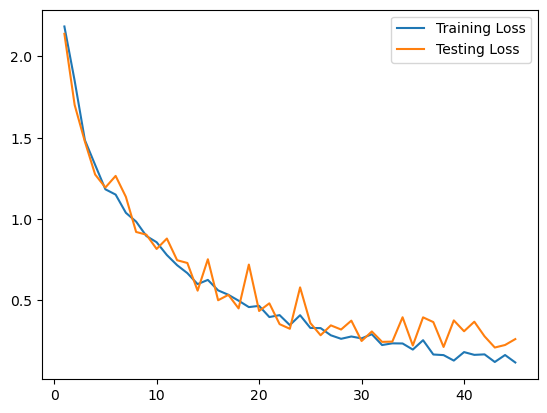

In [83]:
#training loop

epochs = 45
train_loss = []
test_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    testing_loss = 0
    total = 0
    correct = 0
    for images,label in train_loader:

        output = model(images)

        optimizer.zero_grad()

        loss = criteria(output,label)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    train_loss.append((running_loss/len(train_loader)))

    model.eval()
    with torch.no_grad():
        for images,label in test_loader:
            output = model(images)
    
            loss = criteria(output,label)
    
            testing_loss += loss.item()
    
            _,predicted = torch.max(output,1)
    
            total+= label.size(0)
            correct += (predicted==label).sum().item()
    test_loss.append(testing_loss/len(test_loader))
    
    print(f"The epoch: {epoch+1} and training loss: {(running_loss/len(train_loader)):4f}")
    print(f"The epoch: {epoch+1} and testing loss: {(testing_loss/len(test_loader)):4f}")

print(f"The accuracy of the model is: {((correct/total) *100):2f}")

ep_list = [i+1 for i in range(epochs)]
plt.plot(ep_list,train_loss,label = 'Training Loss')
plt.plot(ep_list,test_loss,label = 'Testing Loss')
plt.legend()
plt.show()


In [84]:
dataiter = iter(test_loader)
images,label = next(dataiter)

In [86]:
model.eval()
output = model(images)

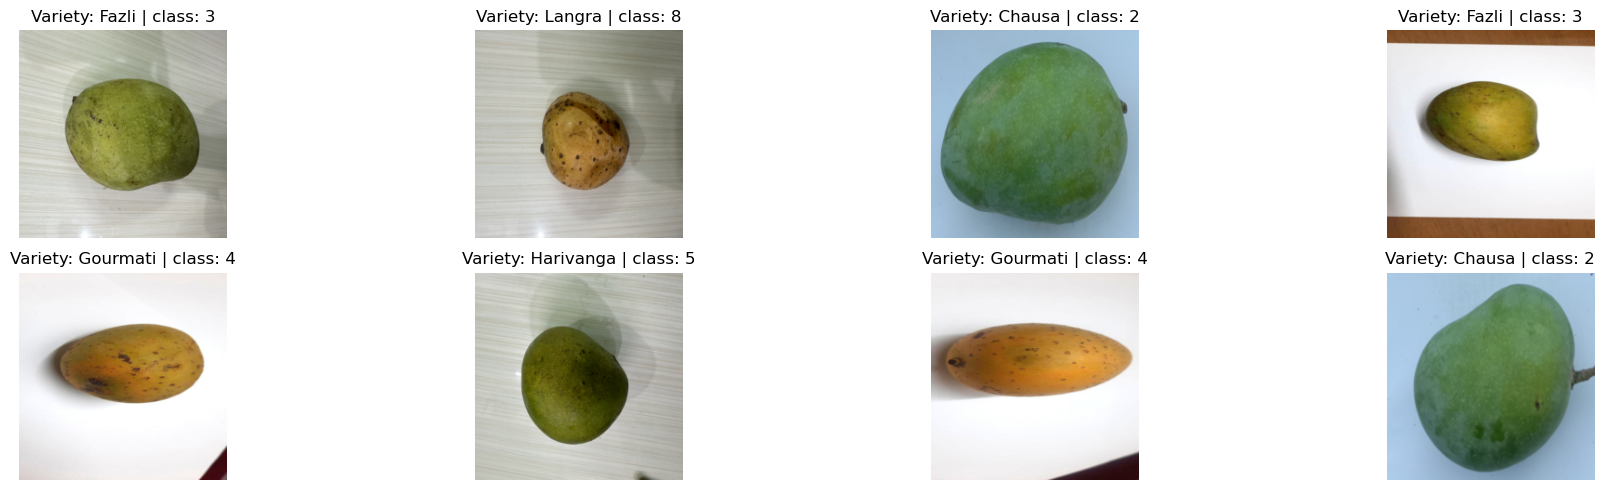

In [120]:
fig,axes = plt.subplots(2,4,figsize =(20,5))
c = 10
for i in range(len(axes)):
    for j in range(len(axes[0])):
        axes[i][j].imshow(images[c].permute(1,2,0))
        axes[i][j].set_title(f"Variety: {man_class[label[c]]} | class: {label[c]}")
        axes[i][j].axis("off")
        c+=1
plt.tight_layout()
plt.show()

In [122]:
x = torch.max(output[10:18],1)
y = x[1]
for i in y:
    print(f"class: {i} | Variety: {man_class[i]}")

class: 3 | Variety: Fazli
class: 8 | Variety: Langra
class: 2 | Variety: Chausa
class: 3 | Variety: Fazli
class: 4 | Variety: Gourmati
class: 5 | Variety: Harivanga
class: 4 | Variety: Gourmati
class: 2 | Variety: Chausa


In [116]:
saved_model_path = r'S:\mango map model\saved model.pth'

In [117]:
torch.save(model.state_dict(),saved_model_path)
print("Model saved successfully")

Model saved successfully
